In [24]:
from citipy import citipy
import random
import pandas as pd
import requests as req
import json
import matplotlib.pyplot as plt

In [25]:
lat = []
lng = []

while len(lat) < 1000:
    lat.append(random.randint(0,90))

while len(lng) < 1000:
    lng.append(random.randint(-180,180))
    
geocodes = list(zip(lat,lng))

In [26]:
city_name = []
country_code = []
for lat, lng in geocodes:
   city = citipy.nearest_city(lat, lng) 
   city_name.append(city.city_name) 
   country_code.append(city.country_code)     

In [27]:
city_data = pd.DataFrame(city_name)
city_data['country code'] = country_code
city_data = city_data.drop_duplicates()
city_data = city_data.rename(columns={0:'city'})
city_data['temperature'] = ''
city_data['cloudiness'] = ''
city_data['wind speed'] = ''
city_data['humidity'] = ''
city_data['latitude'] = ''
city_data['longitude'] = ''
city_data.head()

,city,country code,temperature,cloudiness,wind speed,humidity,latitude,longitude
0,eskisehir,tr,,,,,,
1,chenzhou,cn,,,,,,
2,constitucion,mx,,,,,,
3,mnogovershinnyy,ru,,,,,,
4,boone,us,,,,,,


In [28]:
key = '25bc90a1196e6f153eece0bc0b0fc9eb'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

#i = 0
bad_requests = 0

for index, row in city_data.iterrows():
    params={'q':row['city'],'units':units,'appid':key}
    weather_data = req.get(url,params=params).json()
    try:  
        temp = weather_data['main']['temp']
        wind = weather_data['wind']['speed']
        cloud = weather_data['clouds']['all']
        humidity = weather_data['main']['humidity']
        lat = weather_data['coord']['lat']
        lng = weather_data['coord']['lon']
        
        city_data.set_value(index,'temperature',temp)
        city_data.set_value(index,'cloudiness',cloud)
        city_data.set_value(index,'wind speed',wind)
        city_data.set_value(index,'humidity',humidity)
        city_data.set_value(index,'latitude',lat)
        city_data.set_value(index,'longitude',lng)
    except KeyError:
        print('city not found')
        bad_requests += 1
        if bad_requests > 500:
            break
        continue

    #i = i+1
    
city_data.head()

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not f

,city,country code,temperature,cloudiness,wind speed,humidity,latitude,longitude
0,eskisehir,tr,,,,,,
1,chenzhou,cn,,,,,,
2,constitucion,mx,,,,,,
3,mnogovershinnyy,ru,,,,,,
4,boone,us,,,,,,


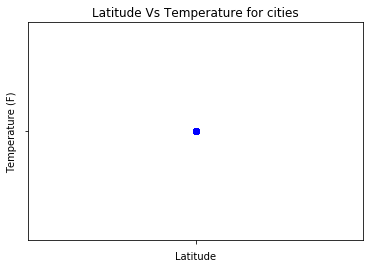

In [29]:
plt.scatter(city_data['latitude'],city_data['temperature'],c='b')
plt.title('Latitude Vs Temperature for cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

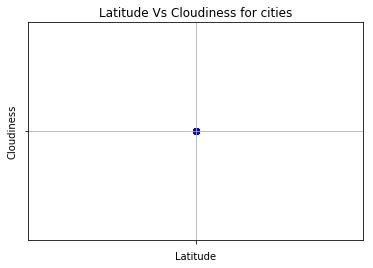

In [30]:
plt.scatter(city_data['latitude'],city_data['cloudiness'],c='b')
plt.title('Latitude Vs Cloudiness for cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.show()

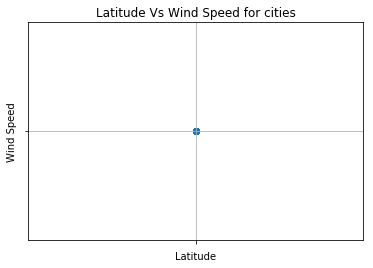

In [31]:
plt.scatter(city_data['latitude'],city_data['wind speed'])
plt.title('Latitude Vs Wind Speed for cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

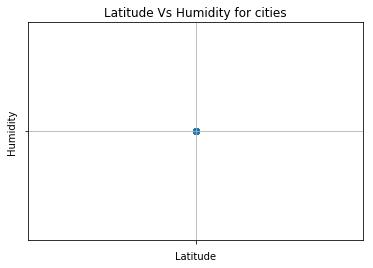

In [16]:
plt.scatter(city_data['latitude'],city_data['humidity'])
plt.title('Latitude Vs Humidity for cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()